<a href="https://colab.research.google.com/github/iaanimashaun/Strive-School-Assigments/blob/main/02_Twitter_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# if you want to use the dataset on Kaggle 
# https://www.kaggle.com/darkcore/basic-nlp-classify


<a id="1"></a>
# **Import Data**

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Strive/Exercises/Module_7_NLP/Week_1/D2_Tokenization/2. Tokenization and RegEx/02. Twitter Stocks/data/stock_data.csv')
data.head(10)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


**There are 2 columns in this dataset:**
1.  "Text"      : Text with special characters and numbers
2. " Sentiment" : Positive and Negative ones

Let's see value counts and most used words

In [5]:
data.Sentiment.value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

<a id="2"></a>

In [8]:

import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px



fig = px.bar(x=data.Sentiment.unique(),y=[data.Sentiment.value_counts()],color=["1","-1"],text=data.Sentiment.value_counts())
fig.update_traces(hovertemplate="Sentiment:'%{x}' Counted: %{y}")
fig.update_layout(title={"text":"Sentiment Counts"},xaxis={"title":"Sentiment"},yaxis={"title":"Count"})
fig.show()

ValueError: ignored

<a id="3"></a>

In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy.lang.en.stop_words import STOP_WORDS


## Preprocessing

Take a look at the tweets and there is some cleaning to be done besides the tasks written below.


[Hint]("urls,user")




In [10]:
# your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [14]:
data.Text

0       Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1       user: AAP MOVIE. 55% return for the FEA/GEED i...
2       user I'd be afraid to short AMZN - they are lo...
3                                       MNTA Over 12.00  
4                                        OI  Over 21.37  
                              ...                        
5786    Industry body CII said #discoms are likely to ...
5787    #Gold prices slip below Rs 46,000 as #investor...
5788    Workers at Bajaj Auto have agreed to a 10% wag...
5789    #Sharemarket LIVE: Sensex off day’s high, up 6...
5790    #Sensex, #Nifty climb off day's highs, still u...
Name: Text, Length: 5791, dtype: object

Remove the punctuation.

In [27]:
doc = nlp(data.Text[0])

no_punc = [token for token in doc if not token.is_punct]

In [39]:
def remove_punc(doc):
  """
  Args:
  string/text

  Returns:
  string/text without punctuation
  """

  doc = nlp(doc)

  no_punc_list = [token for token in doc if not token.is_punct]

  return ' '.join(token.text for token in no_punc_list)

In [69]:
# Removing punctuations...
tweets_no_punc = data.Text.apply(remove_punc)

In [ ]:
# your code here

Add exception for the tokenization so that you can extract all the `$STOCKS`. This is only for the sake of the exercise, however in this way you will end up with two different words for a stock: `$GOOG` and `GOOG` for example. Then check the 20 most frequent stocks. Use them for making your analysis.

In [71]:
from spacy.tokenizer import Tokenizer
import re

#prefix_re = spacy.util.compile_prefix_regex(nlp.Defaults.prefixes)
suffix_re = spacy.util.compile_suffix_regex(nlp.Defaults.prefixes)

In [255]:
# your code here
prefix_re = re.compile(r"[\#|\$][a-zA-Z]+")
#prefix_re = re.compile(r'[$|#][A-Za-z][\S]*')
tokenizer = Tokenizer(
    nlp.vocab, prefix_search=prefix_re.search, suffix_search=suffix_re.search
)


Remove stopwords.

In [256]:
def remove_stopwords(doc):
  """
  Args:
  string/text

  Returns:
  string/text without stopwords
  """

  doc = tokenizer(doc)

  no_sw_list = [token for token in doc if not token.is_stop ]

  return ' '.join(token.text for token in no_sw_list)


In [257]:
tweets_no_sw = tweets_no_punc.apply(remove_stopwords)

In [258]:
tweets_no_sw

0       Kickers watchlist XIDE TIT SOQ PNK CPW BPZ AJ ...
1       user AAP MOVIE 55 return FEA GEED indicator 15...
2       user afraid short AMZN looking like near monop...
3                                            MNTA 12.00  
4                                           OI    21.37  
                              ...                        
5786    Industry body CII said discoms likely suffer n...
5787    Gold prices slip Rs 46,000 investors book prof...
5788    Workers Bajaj Auto agreed 10 wage cut period A...
5789    Sharemarket LIVE Sensex day high 600 points Ni...
5790    Sensex Nifty climb day highs 2 Key factors dri...
Name: Text, Length: 5791, dtype: object

In [ ]:
# your code here

Count the occurrences of each stock name.

In [290]:
stock_names_list = []
for tweet in tweets_no_sw:
  for word in tokenizer(tweet):
    if word.text.isupper():
      #print(word)
      stock_names_list.append(word.text)


In [260]:
from collections import Counter
import matplotlib.pyplot as plt 
import seaborn as sns

stock_names = dict(Counter(stock_names_list))


In [261]:
stock_names_sorted = dict(sorted(stock_names.items(), key=lambda x: x[1], reverse=True))

In [262]:
y = list(stock_names_sorted.values())[:10]
x = list(stock_names_sorted.keys())[:10]

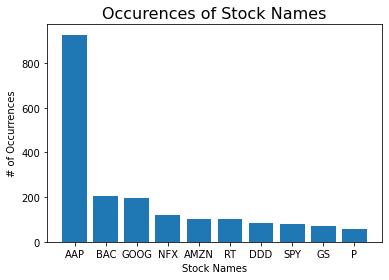

In [263]:
plt.bar(x, y);
plt.title('Occurences of Stock Names', fontdict={'fontsize':16})
plt.xlabel('Stock Names')
plt.ylabel('# of Occurrences');

After removing punctuation, stopwords, made everything lower, use WordCloud to plot a cloud of the words in all the tweets.


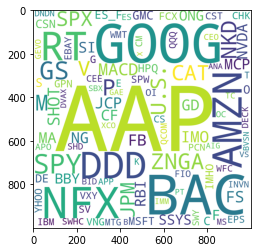

In [264]:
from wordcloud import WordCloud
# your code here

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(stock_names_sorted)
plt.imshow(wc);
# Are there stop words that have not been removed by spaCy? Remove them.

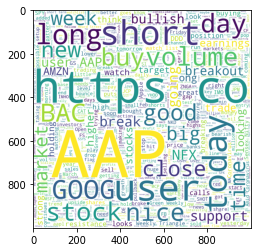

In [156]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=1000,relative_scaling=0.5,normalize_plurals=False).generate(' '.join(tweets_no_sw))
plt.imshow(wc);

Create a function that given the name of a stock return the number of tweets with a positive sentiment and the number of tweets with negative sentiment.

In [265]:
data['tweets_processed'] = tweets_no_sw

In [266]:
pos_tweets = data[data['Sentiment']==1]['tweets_processed'].reset_index(drop=True)

In [267]:
neg_tweets = data[data['Sentiment']==-1]['tweets_processed'].reset_index(drop=True)

In [268]:
neg_tweets

0       AAP user current downtrend break short term co...
1       Monday relative weakness NYX WIN TIE TAP ICE I...
2                    Wo believe AAP uptrend crosses MA(50
3                                         red ready break
4       user adding VXY long today trade got WPI near low
                              ...                        
2101    CoronavirusPandemic \n\n  bad China economic d...
2102    China CoronavirusPandemic \n\n  economy forced...
2103    Goldman Sachs tells investors defensive amid s...
2104    Industry body CII said discoms likely suffer n...
2105    Gold prices slip Rs 46,000 investors book prof...
Name: tweets_processed, Length: 2106, dtype: object

In [269]:
def sentiment_counter(stock_name):
  pos_sent_counter = 0
  neg_sent_counter = 0
  pattern = re.compile(stock_name)
  
  for tweet in pos_tweets:
    #if pattern.match(tweet):
    if stock_name in tweet:
      pos_sent_counter += 1
  for tweet in neg_tweets:
    #if pattern.match(tweet):
    if stock_name in tweet:
      neg_sent_counter += 1
  return pos_sent_counter, neg_sent_counter

In [270]:
sentiment_counter('GOOG')

(118, 70)

In [271]:
# your code here

What are the most common words in the positive tweets? Check it after removing punctuation, stopwords etc. 

In [272]:
pos_words_sorted = sorted(Counter(' '.join(pos_tweets).split()).items(), key=lambda x: x[1], reverse=True)

In [273]:
pos_words_sorted

[('AAP', 517),
 ('user', 441),
 ('today', 234),
 ('volume', 230),
 ('long', 216),
 ('like', 190),
 ('day', 188),
 ('€', 180),
 ('BAC', 155),
 ('good', 154),
 ('stock', 142),
 ('nice', 137),
 ('new', 131),
 ('¦', 131),
 ('watch', 130),
 ('higher', 130),
 ('buy', 125),
 ('GOOG', 120),
 ('ong', 117),
 ('week', 100),
 ('time', 97),
 ('breakout', 97),
 ('close', 95),
 ('highs', 95),
 ('break', 94),
 ('stop', 92),
 ('looking', 91),
 ('looks', 91),
 ('+', 91),
 ('Sensex', 81),
 ('trade', 76),
 ('short', 75),
 ('line', 75),
 ('bullish', 74),
 ('Nifty', 74),
 ('market', 73),
 ('list', 72),
 ('strong', 72),
 ('support', 70),
 ('NFX', 70),
 ('big', 70),
 ('going', 69),
 ('resistance', 69),
 ('10', 69),
 ('stocks', 67),
 ('position', 67),
 ('price', 65),
 ('earnings', 64),
 ('holding', 63),
 ('target', 63),
 ('high', 62),
 ('DDD', 62),
 ('2', 61),
 ('entry', 61),
 ('look', 60),
 ('3', 60),
 ('4', 60),
 ('calls', 59),
 ('AMZN', 58),
 ('term', 57),
 ('breaking', 56),
 ('Stop', 55),
 ('buying', 55),


What are the most common words in the negative tweets? Check it after removing punctuation, stopwords etc. 

In [250]:
neg_words_sorted = sorted(Counter(' '.join(neg_tweets).split()).items(), key=lambda x: x[1], reverse=True)

In [251]:
neg_words_sorted

[('AAP', 410),
 ('short', 278),
 ('€', 239),
 ('user', 200),
 ('¦', 165),
 ('like', 88),
 ('Coronavirus', 77),
 ('Short', 76),
 ('lower', 74),
 ('GOOG', 74),
 ('™', 74),
 ('today', 73),
 (',', 71),
 ('Sensex', 69),
 ('Triangle', 68),
 ('Nifty', 67),
 ('day', 66),
 ('Weekly', 60),
 ('coronavirus', 59),
 ('RT', 57),
 ('stock', 55),
 ('Green', 52),
 ('SPY', 50),
 ('market', 50),
 ('long', 48),
 ('s', 48),
 ('BAC', 48),
 ('support', 48),
 ('NFX', 48),
 ('good', 47),
 ('time', 47),
 ('volume', 45),
 ('AMZN', 45),
 ('red', 44),
 ('SHOT', 43),
 ('puts', 43),
 ('Amid', 41),
 ('looking', 40),
 ('stop', 39),
 ('points', 38),
 ('target', 38),
 ('close', 37),
 ('CAT', 37),
 ('low', 36),
 ('U.S.', 36),
 ('break', 35),
 ('stocks', 35),
 ('gap', 35),
 ('sell', 35),
 ('March', 35),
 ('going', 35),
 ('think', 34),
 ('buy', 34),
 ('trend', 33),
 ('high', 32),
 ('week', 32),
 ('2', 32),
 ('cash', 31),
 ('bearish', 31),
 ('new', 29),
 ('position', 29),
 ('markets', 29),
 ('trade', 28),
 ('earnings', 28),
